In [194]:
import numpy as np
import pandas as pd
import math
try:
    from skmisc.loess import loess
except ImportError:
    from util import loess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Now, we can load the data at data.csv and turn it into the predictor X and the target y

In [166]:
# X is contained in the first column of the data, y in the second.
data=pd.read_csv('data.csv',names=['X','y'])

Create a scatterplot of the data. 

Text(0.5, 1.0, 'Dataset')

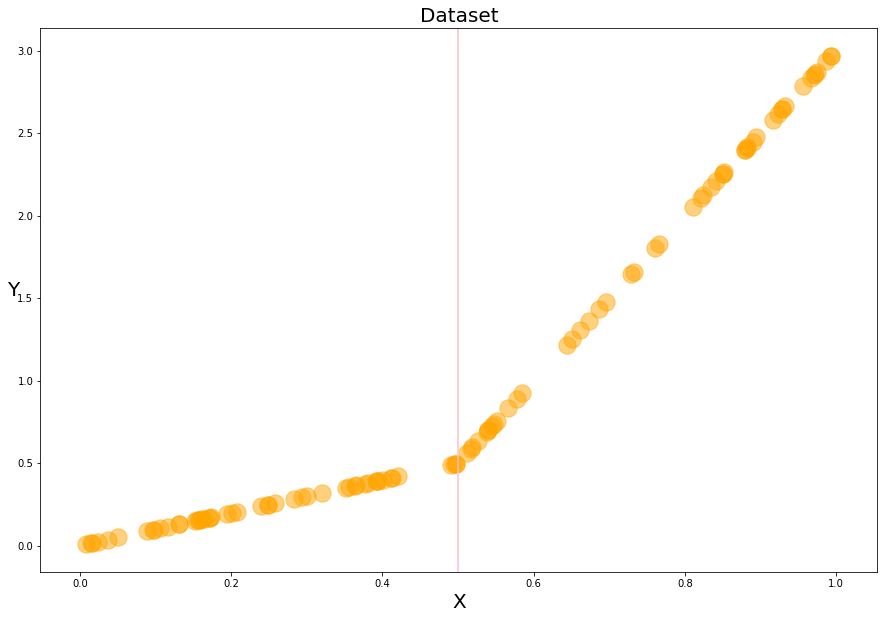

In [167]:
X=data['X']
y=data['y']
plt.scatter(X,y,color='orange',alpha=0.5,s=300)
plt.xlabel('X',fontsize=20)
plt.axvline(x = 0.5, color = 'pink')
plt.ylabel('Y',rotation=0,fontsize=20)
plt.title('Dataset',fontsize=20)

The data shown here demonstrates a piecewise linear relationship between X and Y where the first function(approx x<0.5) have a different slope than the second part(approx x>=0.5).

We now define the kernels $K_1,...,K_4$ as

In [199]:
def K1(x, x_):
    return 1

def K2(x, x_, lam=1):
    return ((1-((abs((x-x_)/lam))**3))**3)

def K3(x, x_, lam=1):
    return math.exp(-lam*abs(x-x_)**2)

def K4(x, x_, L=2):
    return max([1 if ((l-1)/L)<=x and x_<l/L else 0 for l in range(1,L+1)])

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [293]:
def pred(X, y, K,k):
    
    # Start by computing the matrix of all weights we'll need at once.
    weights = np.zeros((X.shape[0],X.shape[0]))
    y_hat=[]
    for i in range(X.shape[0]): # rows
        for j in range(X.shape[0]): # columns
            weights[i,j] = K(X[i], X[j])  
    for m in range(len(weights)):
        model = loess(X, y, weights[m,:])
        model.fit()
        y_hat.append(model.predict(X[m].reshape(-1,1)).values)
    
    plt.plot(X,y_hat,label='K'+str(k+1),alpha=1)
    return y_hat


To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the LOESS model for each of them.

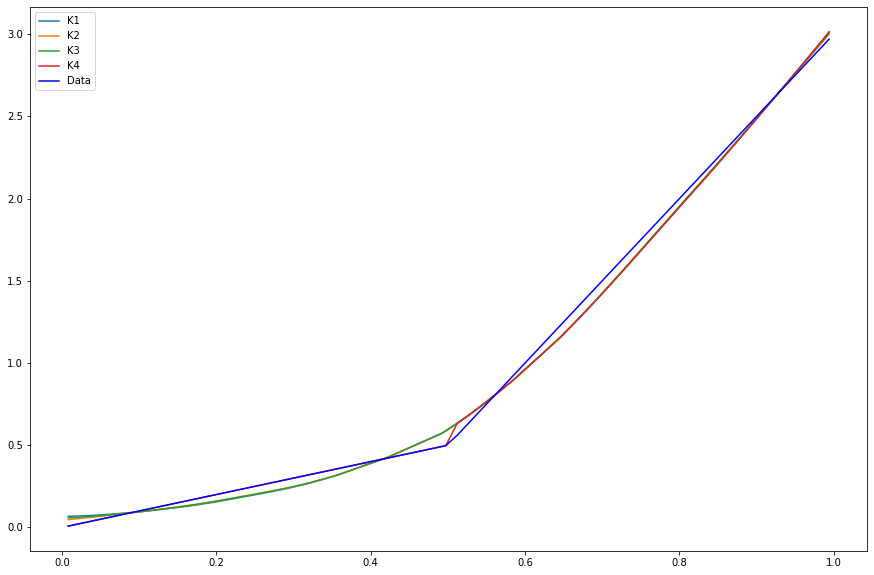

In [294]:
from functools import partial # You may want to use this to make your life easier.

for i,kernel in enumerate([K1,K2,K3, K4]):
    pred(X,y,kernel,i)
#plt.scatter(X, y, c='b',label='Data',alpha=0.5,s=100)
plt.plot(X,y,c='b',label='Data')    
# Adding a legend so we know which kernel produced what is good style.
plt.legend()

We see that model at K3 is the best fit along with required amount of smoothing.